<a href="https://colab.research.google.com/github/CDIMT2024/tristeza/blob/main/ProjetoDengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/maua_logo.png?raw=true" width=300, align="right">



# **Exploratory Data Analysis (EDA)**
## Análse exploratória do mercado financeiro

In [1]:
#@title **Identificação do Grupo**

#@markdown Nomes completos em ordem alfabética (*\<nome\>, \<RA\>*)
Aluno1 = 'Ana Helena Arruda Cavalli Rosa Marcacini, 20.01305-0' #@param {type:"string"}
Aluno2 = 'Enrico Giannobile, 19.00610-0' #@param {type:"string"}
Aluno3 = 'Ettore Padula Dalben, 20.00387-0' #@param {type:"string"}
Aluno4 = 'Guilherme de Campos Mello Guerra Martins, 20.00089-8' #@param {type:"string"}
Aluno5 = 'Laura Caroline Pinto Correia, 20.00171-0' #@param {type:"string"}
Aluno6 = 'Luis Guilherme de Souza Munhoz, 20.01937-8' #@param {type:"string"}





# **Resumo (*Abstract*)**

Apresente um parágrafo um resumo do seu trabalho.

# **Introdução**

Faça uma breve introdução do seu trabalho. Conceitue os pontos relevantes do seu  problema e, se for o caso, das técnicas de análise empregadas. Discuta a relevância, atualidade, limitações das análises existentes e o impacto que  sua análise pode trazer.

# Análise mercado financeiro
## Planejamento
- 1° Curva phillips (juros e inflação)
- 3 períodos de maior destaque pra fazer analise
- Correl - Cov - Graf dispersão - Tenta plotar a curva de phillips histórica brasil
- Quais bens tem mais inflação?

- 1° IPCA é uma métrica sólida (falar da proporção da cesta)
- 2° Qual o racional por trás do IPCA
- 3° Qual o papel do Banco central nas metas do IPCA
- 4° Grafico se o BC conseguiu atingir essas metas com os anos
- 5° Juros como ferramenta pra controlar o IPCA
- 6° Cruzar a série histórica do IPCA x SELIC e ver se tem correlação
- 7° Fazer um gráfico com os bens que possuem maior variação nos ultimos anos
- 8° Tentar explicar isso
- 9° Grafico dispersão
- 10° Ver outras coisas

- 2° Gastos publicos x PIB
- 1° Qual a função dos gastos publicos -teoria
- 2° Graficos de gastos e pib com o passar do tempo (correl)
- 3° Observar alguma tendencia com o passar do tempo (epocas de eleição etc)
- 4° Analisar diferentes periodos de tempo
- 5° Pode adicionar a variável IPCA como efeito colateral dos gastos publicos
- 6° Ver correlação entre as variáveis

# **Aquisição e Preparação dos dados**

Faça aqui a aquisição dos dados, justificando e incluindo aqui eventuais reduções as efetuadas.

Não deixe de descrever e justificar reduções (seleções) feitas nos dados originais para os seus propósitos (por exemplo, selecionou somente dados do último ano, somente dados de países da América Latina ou selecionou somente algumas tabelas dentre várias tabelas disponíveis).








In [2]:
%pip install ipeadatapy --quiet

In [3]:
import pandas as pd
import numpy as np
import requests
import ipeadatapy
from datetime import date

## Extraindo alguns dados via RPA (espero que rode quando o Rogério for avaliar) e outros via biblioteca do IPEA para não depender de subir arquivos no drive

### Buscando dados do IPCA

In [4]:
df_ipca = ipeadatapy.timeseries("PRECOS12_IPCAG12")
df_ipca.reset_index(inplace=True)
df_ipca.head()

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.m.))
0,1980-01-01,PRECOS12_IPCAG12,1980-01-01T00:00:00-02:00,1,1,1980,6.615649
1,1980-02-01,PRECOS12_IPCAG12,1980-02-01T00:00:00-02:00,1,2,1980,4.616919
2,1980-03-01,PRECOS12_IPCAG12,1980-03-01T00:00:00-03:00,1,3,1980,6.038389
3,1980-04-01,PRECOS12_IPCAG12,1980-04-01T00:00:00-03:00,1,4,1980,5.286114
4,1980-05-01,PRECOS12_IPCAG12,1980-05-01T00:00:00-03:00,1,5,1980,5.702721


In [5]:
url = "https://www.idealsoftwares.com.br/indices/ipca_ibge.html"
# lendo tabelas do html da url
df_ipca = pd.read_html(io=url, encoding="utf-8", decimal=",", thousands=".")[1]
df_ipca.columns = df_ipca.head(1).values.tolist()[0]
df_ipca.drop(0, inplace=True)
df_ipca = df_ipca[~df_ipca["Mês/ano"].str.match("\d{4}")]
columns = df_ipca.columns.tolist().copy()
columns.remove("Mês/ano")
# dropando dados vazios
df_ipca = df_ipca.dropna(subset=columns)
df_ipca.reset_index(drop=True, inplace=True)
df_ipca.head()


,Mês/ano,Índice do mês (em %),Índice acumulado no ano (em %),Índice acumulado nos últimos 12 meses (em %),Número índice acumulado a partir de Jan/93
0,Jan/2024,0.42,0.4200,4.5066,1752.8837
1,Fev/2024,0.83,1.2535,4.4963,1767.4327
2,Mar/2024,0.16,1.4155,3.9256,1770.2606
3,Abr/2024,0.38,1.8009,3.6880,1776.9876
4,Jan/2023,0.53,0.5300,5.7743,1677.2942


In [6]:
# extraindo dados da API do Bacen
params = {
    "tronco": "estatisticas",
    "guidLista": "323626f4-c92f-46d6-bac7-55bf88f6430b",
    "dataInicial": "25/05/2004",
    "dataFinal": "25/05/2028",
    "serie": "13522",
}

url = "https://www.bcb.gov.br/api/servico/sitebcb/bcdatasgs"
resp = requests.get(url, params=params)
df_ipca = pd.DataFrame(resp.json()["conteudo"])
df_ipca["data"] = pd.to_datetime(df_ipca["data"], dayfirst=True)
df_ipca.rename(columns={"data": "DateTime", "valor": "IPCA ocorrido"}, inplace=True)
df_ipca

,DateTime,IPCA ocorrido
0,2004-05-01,5.15
1,2004-06-01,6.06
2,2004-07-01,6.81
3,2004-08-01,7.18
4,2004-09-01,6.70
...,...,...
235,2023-12-01,4.62
236,2024-01-01,4.51
237,2024-02-01,4.50
238,2024-03-01,3.93


In [7]:
# extraindo dados da API do Bacen
params = {
    "tronco": "estatisticas",
    "guidLista": "24B1BB18-E0FC-4FB0-9A5D-FC22208369CA",
    "data": "2004/01/01",
}

url = "https://www.bcb.gov.br/api/servico/sitebcb/datavalor"
resp = requests.get(url, params=params)
df_focus = pd.DataFrame(resp.json()["conteudo"])
df_focus["data"] = pd.to_datetime(df_focus["data"], dayfirst=True)
df_focus.rename(columns={"data": "DateTime", "valor": "Focus mais recente"}, inplace=True)
df_focus

,DateTime,Focus mais recente
0,2018-01-10 10:00:00+00:00,4.56
1,2018-01-11 11:00:00+00:00,4.05
2,2018-01-12 10:00:00+00:00,3.75
3,2019-01-01 10:00:00+00:00,3.78
4,2019-01-02 10:00:00+00:00,3.89
...,...,...
87,2026-01-01 03:00:00+00:00,3.69
88,2026-01-02 03:00:00+00:00,3.68
89,2026-01-03 03:00:00+00:00,3.66
90,2026-01-04 03:00:00+00:00,3.62


### Buscando dados selic

#### Meta para Selic

In [8]:
# extraindo dados da API do Bacen
params = {
    "tronco": "estatisticas",
    "guidLista": "323626f4-c92f-46d6-bac7-55bf88f6430b",
    "dataInicial": "25/05/2004",
    "dataFinal": "25/05/2028",
    "serie": "432",
}

url = "https://www.bcb.gov.br/api/servico/sitebcb/bcdatasgs"
resp = requests.get(url, params=params)
df_meta_selic = pd.DataFrame(resp.json()["conteudo"])
df_meta_selic["data"] = pd.to_datetime(df_meta_selic["data"], dayfirst=True)
df_meta_selic.rename(columns={"data": "DateTime", "valor": "Meta para a taxa Selic"}, inplace=True)
df_meta_selic.head()

,DateTime,Meta para a taxa Selic
0,2004-05-25,16.00
1,2004-05-26,16.00
2,2004-05-27,16.00
3,2004-05-28,16.00
4,2004-05-29,16.00


### Selic

In [9]:
df_selic = ipeadatapy.timeseries("BM12_TJOVER12")
df_selic.reset_index(inplace=True)
df_selic


,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.m.))
0,1974-01-01,BM12_TJOVER12,1974-01-01T00:00:00-02:00,1,1,1974,1.46
1,1974-02-01,BM12_TJOVER12,1974-02-01T00:00:00-02:00,1,2,1974,1.15
2,1974-03-01,BM12_TJOVER12,1974-03-01T00:00:00-03:00,1,3,1974,1.16
3,1974-04-01,BM12_TJOVER12,1974-04-01T00:00:00-03:00,1,4,1974,1.21
4,1974-05-01,BM12_TJOVER12,1974-05-01T00:00:00-03:00,1,5,1974,1.24
...,...,...,...,...,...,...,...
600,2024-01-01,BM12_TJOVER12,2024-01-01T00:00:00-03:00,1,1,2024,0.97
601,2024-02-01,BM12_TJOVER12,2024-02-01T00:00:00-03:00,1,2,2024,0.80
602,2024-03-01,BM12_TJOVER12,2024-03-01T00:00:00-03:00,1,3,2024,0.83
603,2024-04-01,BM12_TJOVER12,2024-04-01T00:00:00-03:00,1,4,2024,0.89


### Buscando dados desemprego

In [10]:
# extraindo dados da API do Bacen
params = {
    "tronco": "estatisticas",
    "guidLista": "323626f4-c92f-46d6-bac7-55bf88f6430b",
    "dataInicial": "01/04/2004",
    "dataFinal": "25/05/2028",
    "serie": "24369",
}

url = "https://www.bcb.gov.br/api/servico/sitebcb/bcdatasgs"
resp = requests.get(url, params=params)
df_desemprego = pd.DataFrame(resp.json()["conteudo"])
df_desemprego["data"] = pd.to_datetime(df_desemprego["data"], dayfirst=True)
df_desemprego.rename(columns={"data": "DateTime", "valor": "Taxa de desocupação – desemprego"}, inplace=True)
df_desemprego.head()

,DateTime,Taxa de desocupação – desemprego
0,2012-03-01,8.0
1,2012-04-01,7.8
2,2012-05-01,7.7
3,2012-06-01,7.6
4,2012-07-01,7.5


## Buscando dados IPC-Br

In [11]:
# extraindo dados da API do Bacen
params = {
    "tronco": "estatisticas",
    "guidLista": "E6FED50C-BBEC-4A7C-B5AE-8899157E4AE2",
    "data": "2004/05/24",
}

url = "https://www.bcb.gov.br/api/servico/sitebcb/datavalor"
resp = requests.get(url, params=params)
df_ipcbr = pd.DataFrame(resp.json()["conteudo"])
df_ipcbr["data"] = pd.to_datetime(df_ipcbr["data"], dayfirst=True)
df_ipcbr.rename(columns={"data": "DateTime", "valor": "IBC-Br - atividade econômica"}, inplace=True)
df_ipcbr.head()

,DateTime,IBC-Br - atividade econômica
0,2008-01-10 03:00:00+00:00,5.59
1,2008-01-11 02:00:00+00:00,4.98
2,2008-01-12 02:00:00+00:00,4.31
3,2009-01-01 02:00:00+00:00,3.36
4,2009-01-02 02:00:00+00:00,2.32


### Buscando dados CDI

In [12]:
df_cdi = ipeadatapy.timeseries("BM12_TJCDI12")
df_cdi.reset_index(inplace=True)
df_cdi

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.m.))
0,1986-03-01,BM12_TJCDI12,1986-03-01T00:00:00-03:00,1,3,1986,0.87
1,1986-04-01,BM12_TJCDI12,1986-04-01T00:00:00-03:00,1,4,1986,1.37
2,1986-05-01,BM12_TJCDI12,1986-05-01T00:00:00-03:00,1,5,1986,1.32
3,1986-06-01,BM12_TJCDI12,1986-06-01T00:00:00-03:00,1,6,1986,1.57
4,1986-07-01,BM12_TJCDI12,1986-07-01T00:00:00-03:00,1,7,1986,2.23
...,...,...,...,...,...,...,...
454,2024-01-01,BM12_TJCDI12,2024-01-01T00:00:00-03:00,1,1,2024,0.97
455,2024-02-01,BM12_TJCDI12,2024-02-01T00:00:00-03:00,1,2,2024,0.80
456,2024-03-01,BM12_TJCDI12,2024-03-01T00:00:00-03:00,1,3,2024,0.83
457,2024-04-01,BM12_TJCDI12,2024-04-01T00:00:00-03:00,1,4,2024,0.89


### Buscando PIB per capta

In [13]:
df_pib = ipeadatapy.timeseries("BM12_PIB12")
df_pib.reset_index(inplace=True)
df_pib


,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (R$)
0,1990-01-01,BM12_PIB12,1990-01-01T00:00:00-02:00,1,1,1990,0.2
1,1990-02-01,BM12_PIB12,1990-02-01T00:00:00-02:00,1,2,1990,0.4
2,1990-03-01,BM12_PIB12,1990-03-01T00:00:00-03:00,1,3,1990,0.8
3,1990-04-01,BM12_PIB12,1990-04-01T00:00:00-03:00,1,4,1990,0.7
4,1990-05-01,BM12_PIB12,1990-05-01T00:00:00-03:00,1,5,1990,0.8
...,...,...,...,...,...,...,...
407,2023-12-01,BM12_PIB12,2023-12-01T00:00:00-03:00,1,12,2023,939618.2
408,2024-01-01,BM12_PIB12,2024-01-01T00:00:00-03:00,1,1,2024,883698.6
409,2024-02-01,BM12_PIB12,2024-02-01T00:00:00-03:00,1,2,2024,897934.3
410,2024-03-01,BM12_PIB12,2024-03-01T00:00:00-03:00,1,3,2024,972728.9


# **Análises**

Busque orientar sua análise a perguntas que sejam feitas aos dados. Empregue de 5 a 6 perguntas relevantes, que podem estar relacionadas 1-2 temas dentro do problema escolhido. Empregue seleções, gráficos e outros recursos que julgar necessário para **comunicar** suas análises. Empregue instrumentos que dão suporte à sua análise, como correlações, gráficos, pareto, teste de hipóteses etc.

Abaixo um modelo opcional para as perguntas.

## **Q1. Pergunta 1.** Quais são as doenças endêmicas de notificação obrigatória mais correlacionadas ao clima no estado de São Paulo?

As doenças endêmicas notificadas são...

In [14]:
# seu código

### **Conclusão**

A gripe viral apresenta uma correlação bastante maior que as demais doenças, com 15% acima da segunda colocada (Chikungunha). O gráfico ainda mostra uma maior incidência nos meses...

# **Referências**

Este é um item obrigatório.

# **Conclusão**

Apresente a conclusão do seu estudo. Indique limitações da tecnologia/conceitos, novos avanços e compare com tecnologias/conceitos concorrentes.



# **Apêndice: Vídeo, GitHub e Datafólio**

Publique (YouTube ou qualquer outro de acesso público) um vídeo explicativo apresentando o seu trabalho em no máximo 4min. Foque na relevância do problema e nos resultados obtidos. Salve em um GitHub público seu projeto (o notebook Python, dados, Datafólio).

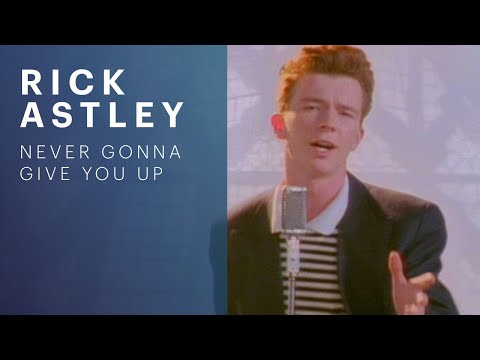

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo('dQw4w9WgXcQ')

---

In [16]:
#@markdown
#@title **Avaliação**
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas 5-6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados.
Relevancia = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema.
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatísticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva
Conclusao = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 1 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 10 #@param {type:"slider", min:0, max:10, step:1}
Video = 10 #@param {type:"slider", min:0, max:10, step:1}





In [17]:
#@markdown # **Nota Final**
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_ra = []
lista_nome = []

for i in range(1,7):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_nome.append(lista[0]); lista_ra.append(lista[1].upper())")

alunos['ra'] = lista_ra
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 11.0



,ra,nome,nota
0,20.01305-0,Ana Helena Arruda Cavalli Rosa Marcacini,11.0
1,19.00610-0,Enrico Giannobile,11.0
2,20.00387-0,Ettore Padula Dalben,11.0
3,20.00089-8,Guilherme de Campos Mello Guerra Martins,11.0
4,20.00171-0,Laura Caroline Pinto Correia,11.0
5,20.01937-8,Luis Guilherme de Souza Munhoz,11.0
